## About this data
####Variables
- Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.
####Demographic:
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
####Behavioral
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)
####Medical(current)
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)
####Predict variable (desired target)
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('framingham.csv',sep=',')

In [3]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [4]:
df.describe().T.style.background_gradient()  #cmap = "Spectral"

,count,mean,std,min,25%,50%,75%,max
male,4238.000000,0.429212,0.495022,0.000000,0.000000,0.000000,1.000000,1.000000
age,4238.000000,49.584946,8.572160,32.000000,42.000000,49.000000,56.000000,70.000000
education,4133.000000,1.978950,1.019791,1.000000,1.000000,2.000000,3.000000,4.000000
currentSmoker,4238.000000,0.494101,0.500024,0.000000,0.000000,0.000000,1.000000,1.000000
cigsPerDay,4209.000000,9.003089,11.920094,0.000000,0.000000,0.000000,20.000000,70.000000
BPMeds,4185.000000,0.029630,0.169584,0.000000,0.000000,0.000000,0.000000,1.000000
prevalentStroke,4238.000000,0.005899,0.076587,0.000000,0.000000,0.000000,0.000000,1.000000
prevalentHyp,4238.000000,0.310524,0.462763,0.000000,0.000000,0.000000,1.000000,1.000000
diabetes,4238.000000,0.025720,0.158316,0.000000,0.000000,0.000000,0.000000,1.000000
totChol,4188.000000,236.721585,44.590334,107.000000,206.000000,234.000000,263.000000,696.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [7]:
for i in df.columns:
  print('-'*40)
  print(i)
  print(df[i].value_counts())
  print('*'*40)

----------------------------------------
male
0    2419
1    1819
Name: male, dtype: int64
****************************************
----------------------------------------
age
40    191
46    182
42    180
41    174
48    173
39    169
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
54    132
49    132
57    123
56    123
59    119
58    117
60    111
63    110
61    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
34     18
68     18
69      7
33      5
70      2
32      1
Name: age, dtype: int64
****************************************
----------------------------------------
education
1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64
****************************************
----------------------------------------
currentSmoker
0    2144
1    2094
Name: currentSmoker, dtype: int64
****************************************
----------------------------------------
cigsPer

In [8]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:>

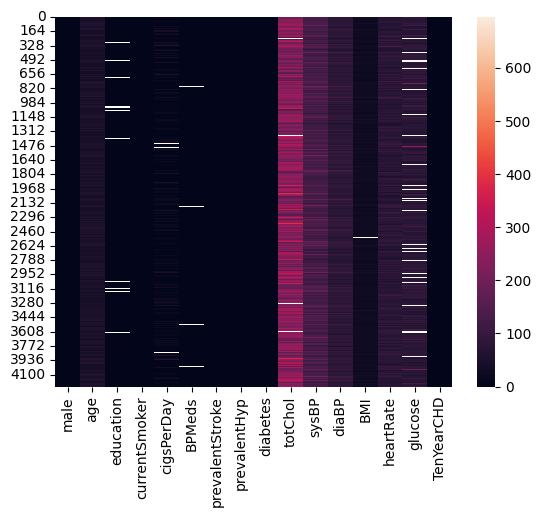

In [9]:
sns.heatmap(df)

In [10]:
df['education'].fillna(df['education'].median(),inplace=True)

In [11]:
df['cigsPerDay'].fillna(int(df['cigsPerDay'].mean()),inplace=True)

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df['BPMeds']=imputer.fit_transform(df[['BPMeds']])

In [13]:
df['totChol'].fillna(df['totChol'].median(),inplace=True)

In [14]:
df['BMI'].fillna(df['BMI'].median(),inplace=True)

In [15]:
df['heartRate'].fillna(df['heartRate'].median(),inplace=True)

In [16]:
df['glucose'].fillna(int(df['glucose'].mean()),inplace=True)

In [17]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<AxesSubplot:>

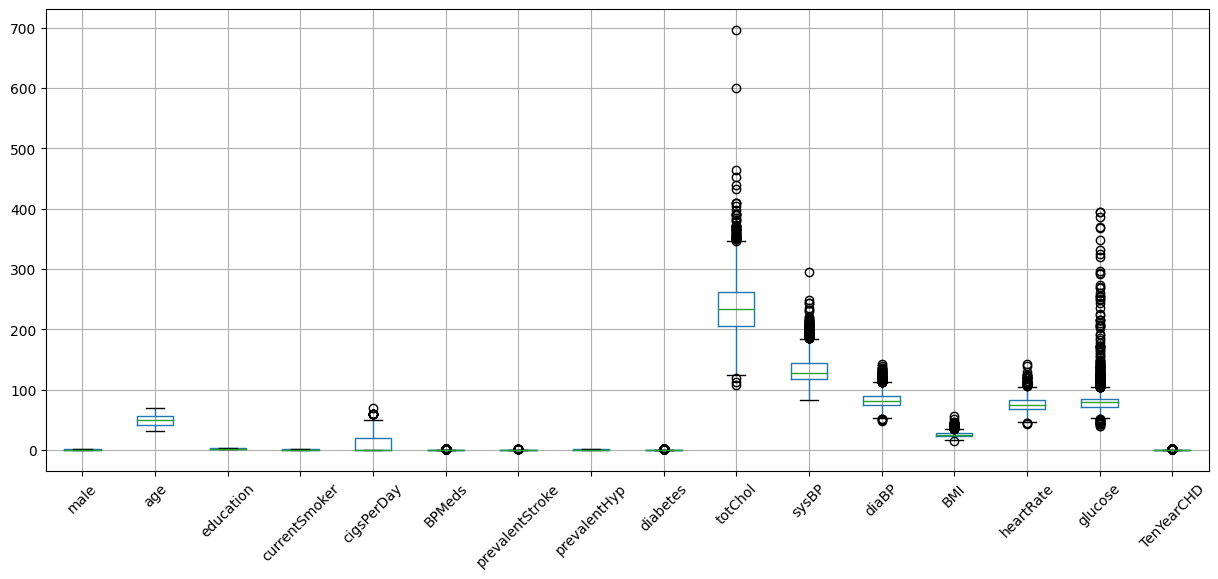

In [18]:
plt.figure(figsize = (15,6))
df.boxplot(rot=45)

<AxesSubplot:xlabel='glucose', ylabel='Count'>

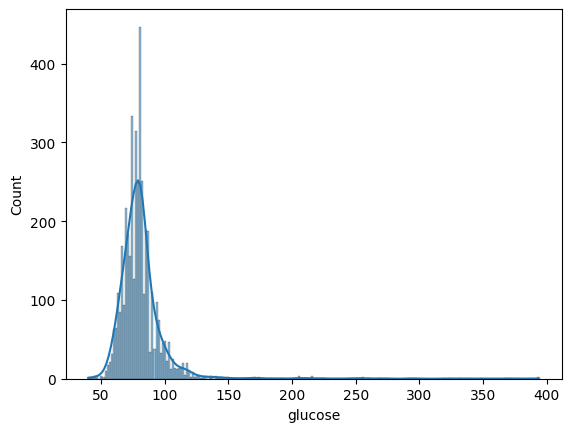

In [19]:
sns.histplot(data=df, x= "glucose", kde=True)

In [20]:
from scipy.stats import skew

----------------------------------------
male
0.2860335437078504


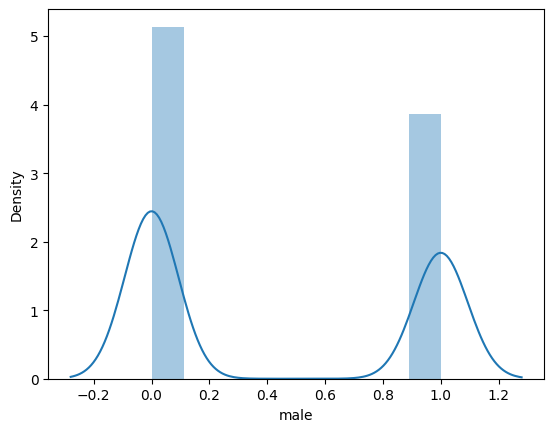

****************************************
----------------------------------------
age
0.22806501927587203


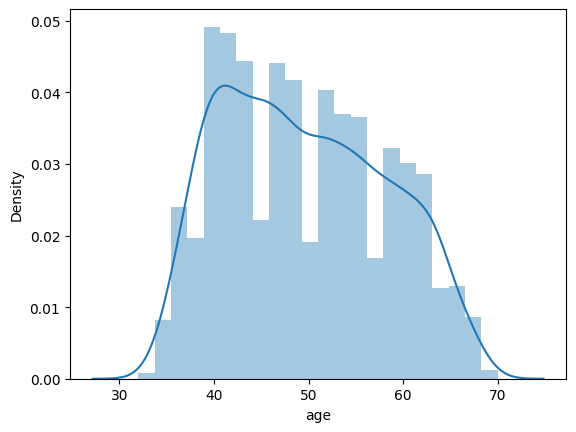

****************************************
----------------------------------------
education
0.6969245219700375


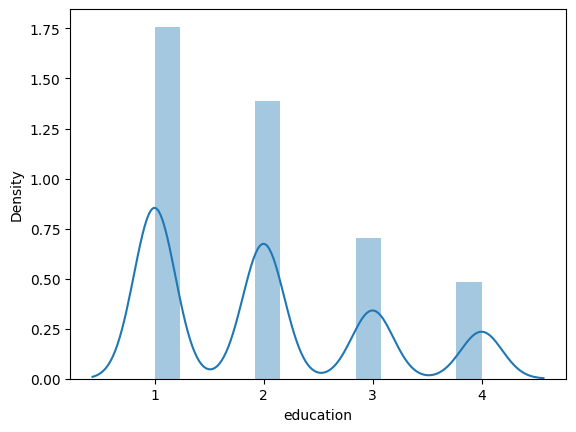

****************************************
----------------------------------------
currentSmoker
0.023597678241622375


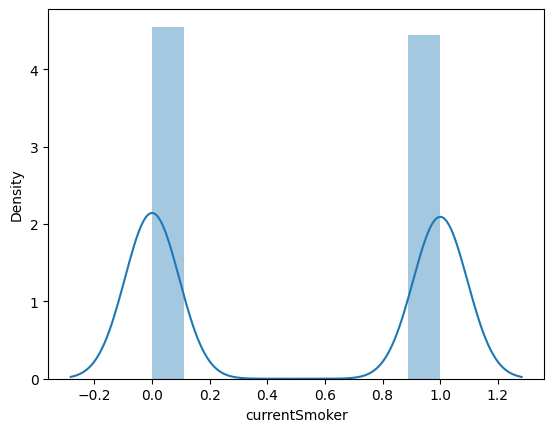

****************************************
----------------------------------------
cigsPerDay
1.2517606054039054


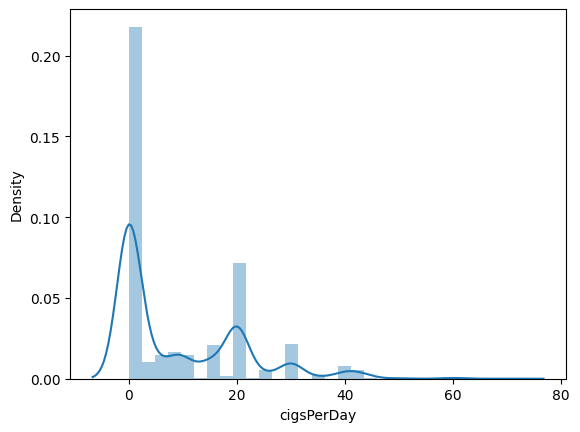

****************************************
----------------------------------------
BPMeds
5.586372735223755


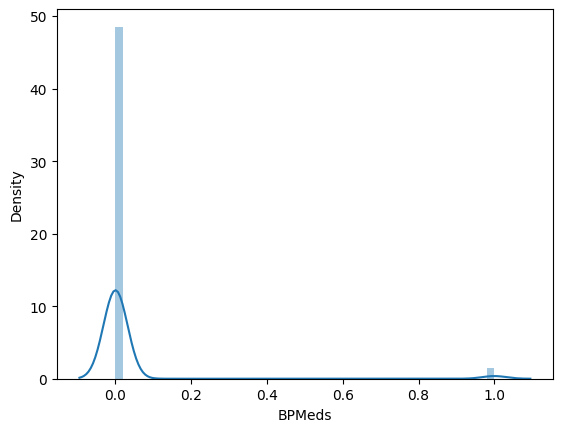

****************************************
----------------------------------------
prevalentStroke
12.904492784056524


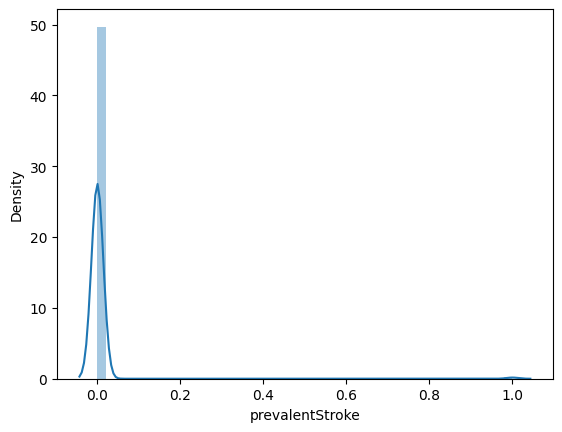

****************************************
----------------------------------------
prevalentHyp
0.8189879096327174


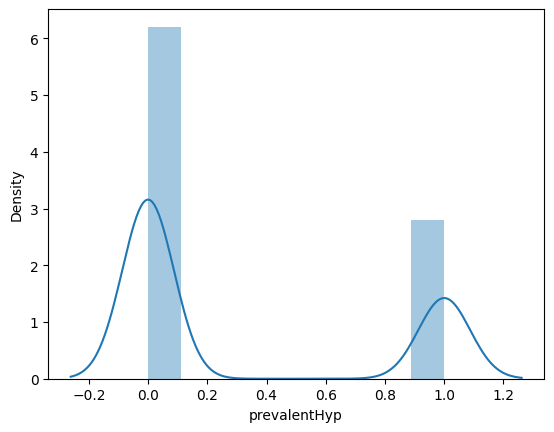

****************************************
----------------------------------------
diabetes
5.99225605166314


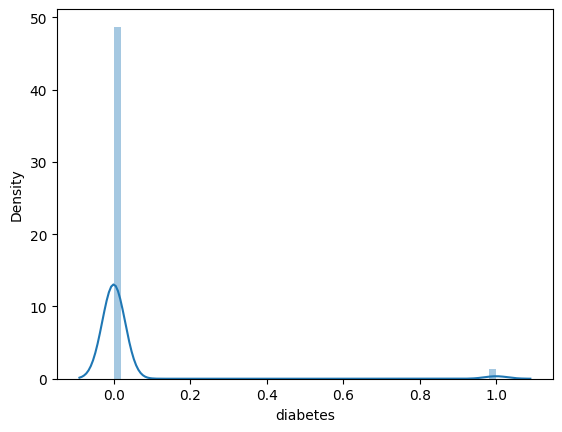

****************************************
----------------------------------------
totChol
0.8784073145784838


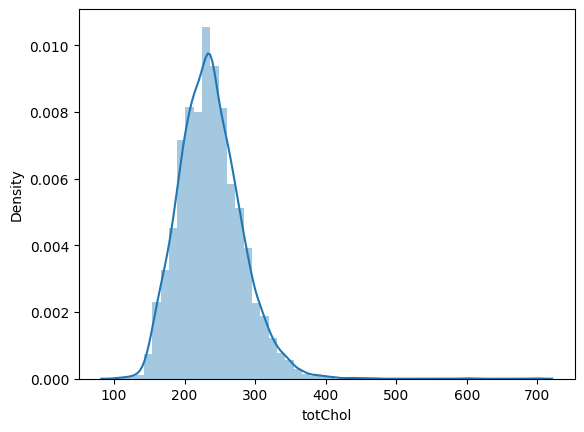

****************************************
----------------------------------------
sysBP
1.1449567062594848


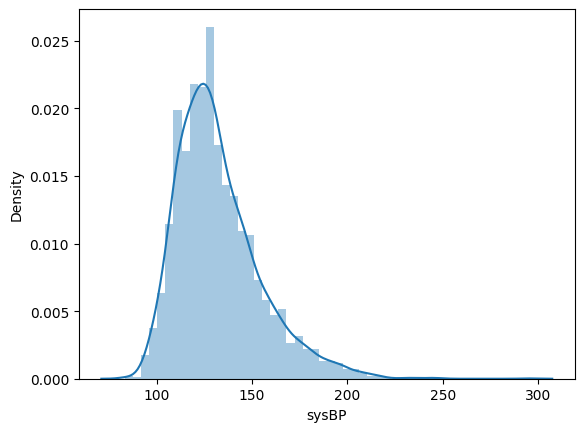

****************************************
----------------------------------------
diaBP
0.7138494094062997


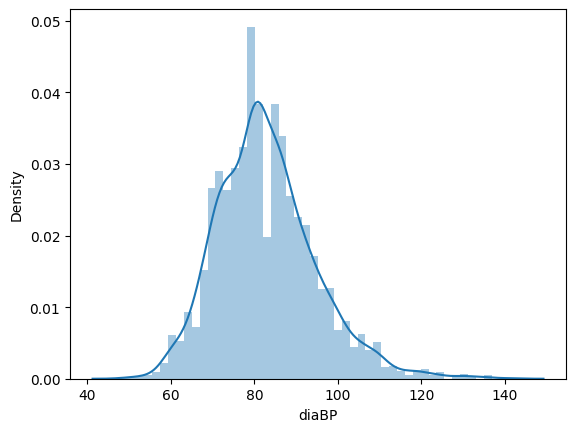

****************************************
----------------------------------------
BMI
0.9850927407330611


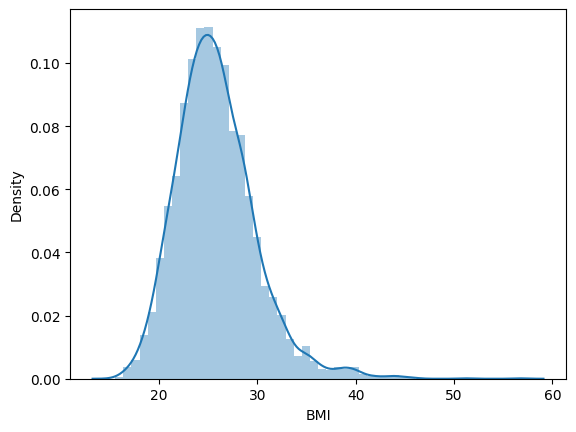

****************************************
----------------------------------------
heartRate
0.6443800064756061


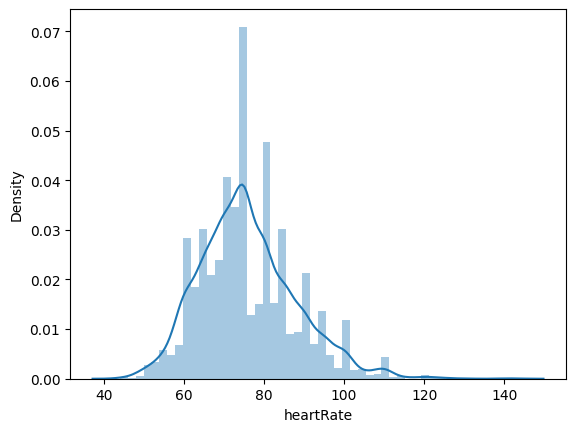

****************************************
----------------------------------------
glucose
6.526602280134371


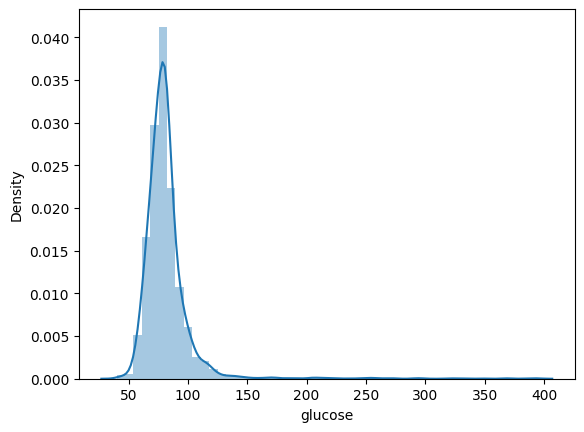

****************************************
----------------------------------------
TenYearCHD
1.9390546347112285


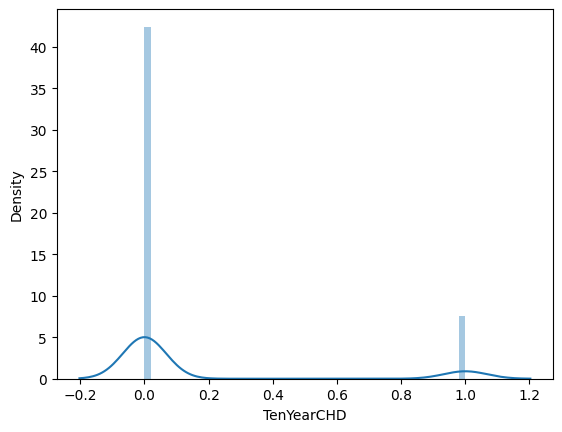

****************************************


In [21]:
for i in df:
  print('-'*40)
  print(i)
  print(skew(df[i]))
  plt.figure()
  sns.distplot(df[i])
  plt.show()
  print('*'*40)

<AxesSubplot:xlabel='totChol'>

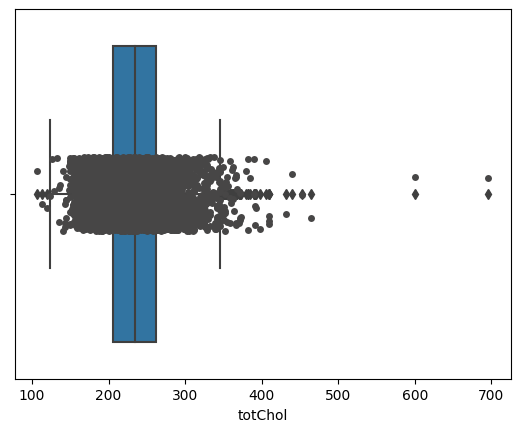

In [23]:
sns.boxplot(data= df, x = "totChol")
sns.stripplot(x='totChol', data=df, color="#474646")

In [24]:
from datasist.structdata import detect_outliers
outliers_indices = detect_outliers(df, 0,df[['totChol']])
print(len(outliers_indices))
df.drop(outliers_indices, inplace=True)

57


<AxesSubplot:xlabel='sysBP'>

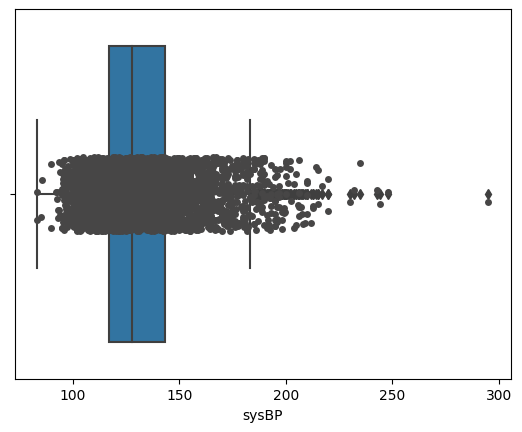

In [25]:
sns.boxplot(data= df, x = "sysBP")
sns.stripplot(x='sysBP', data=df, color="#474646")

In [26]:
df=df[df['sysBP']<200]

<AxesSubplot:xlabel='diaBP'>

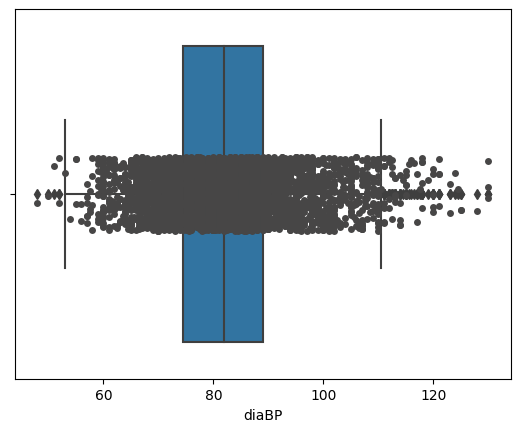

In [27]:
sns.boxplot(data= df, x = "diaBP")
sns.stripplot(x='diaBP', data=df, color="#474646")

In [28]:
df=df[df['diaBP']<115]

<AxesSubplot:xlabel='BMI'>

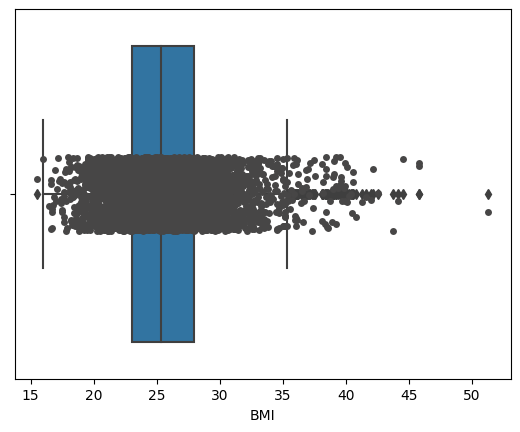

In [29]:
sns.boxplot(data= df, x = "BMI")
sns.stripplot(x='BMI', data=df, color="#474646")

In [30]:
df=df[df['BMI']<38]

<AxesSubplot:xlabel='heartRate'>

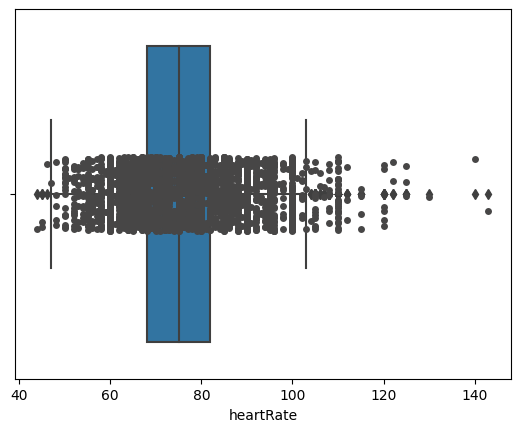

In [31]:
sns.boxplot(data= df, x = "heartRate")
sns.stripplot(x='heartRate', data=df, color="#474646")

In [32]:
df=df[df['heartRate']<108]

<AxesSubplot:xlabel='glucose'>

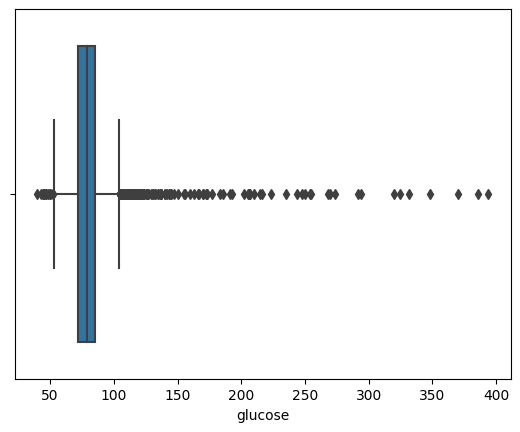

In [33]:
sns.boxplot(data= df, x = "glucose")

In [34]:
df=df[df['glucose']<140]

<AxesSubplot:>

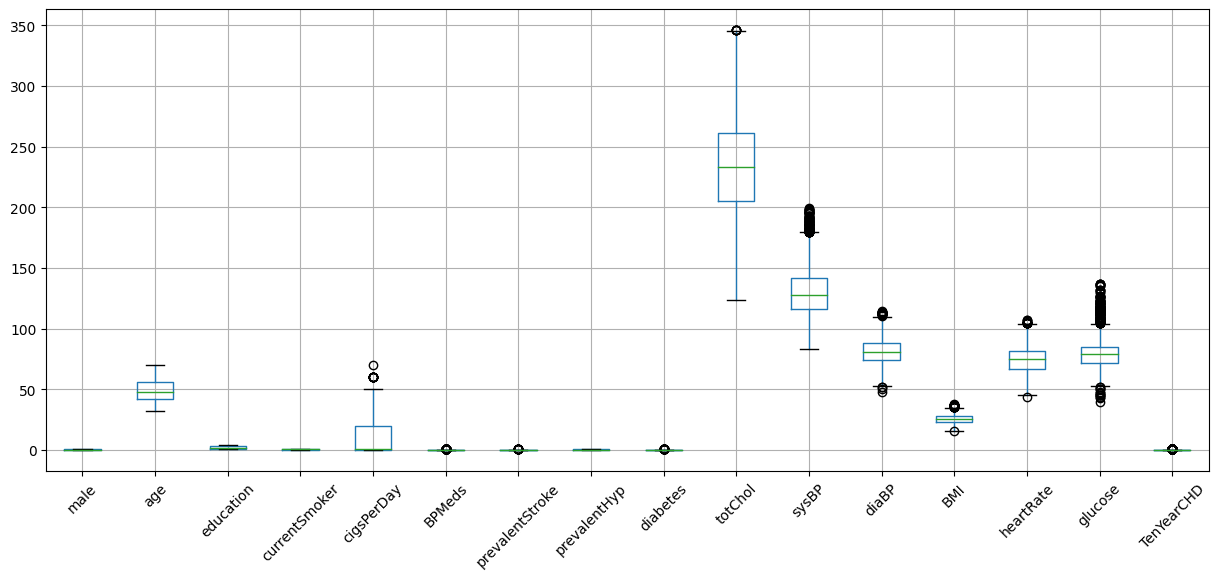

In [35]:
plt.figure(figsize = (15,6))
df.boxplot(rot=45)

In [22]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

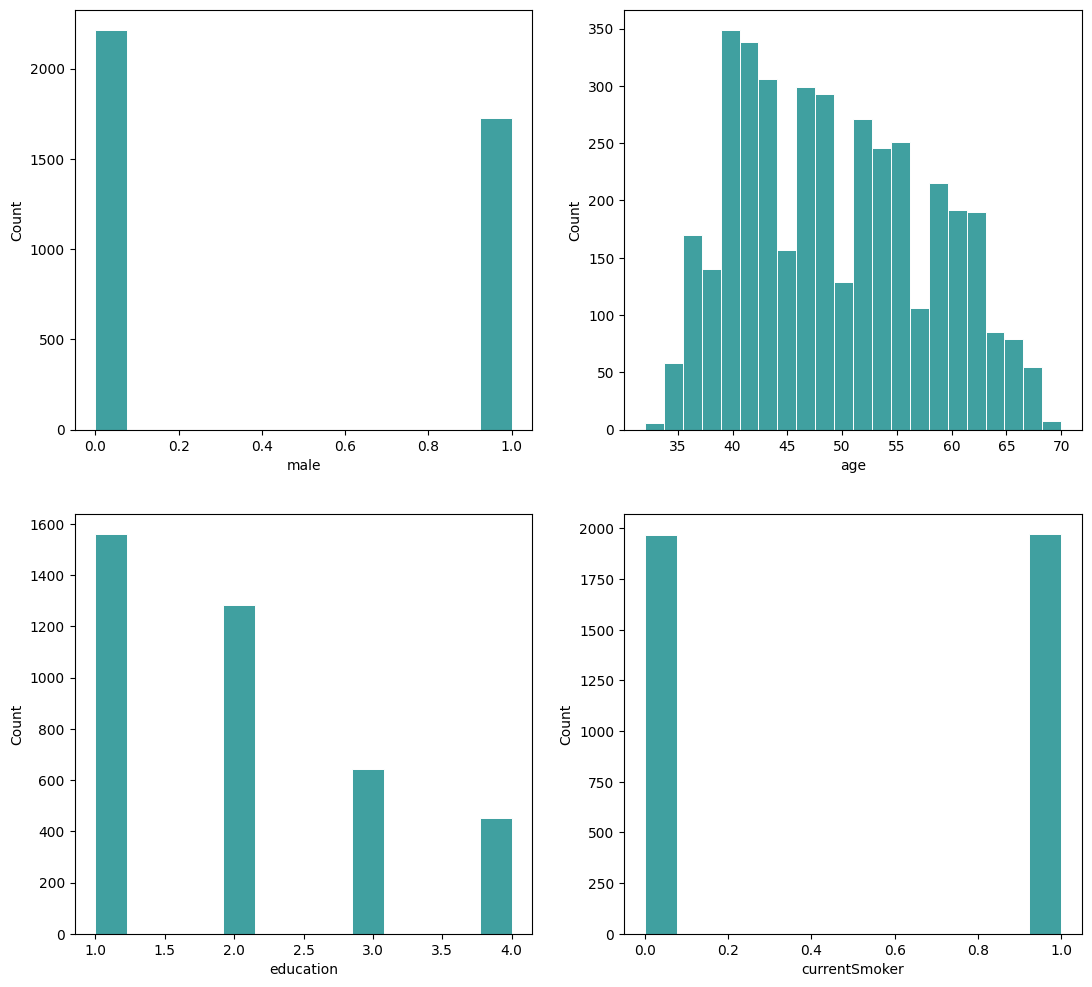

In [37]:
c=['male', 'age', 'education', 'currentSmoker']

fig, ax = plt.subplots(nrows = 2,ncols =2,figsize = (13,12))
for i in range(len(c)):
    plt.subplot(2,2,i+1)
    sns.histplot(data=df,x=df[c[i]], color='teal',edgecolor="white", linewidth=0.7)

<AxesSubplot:>

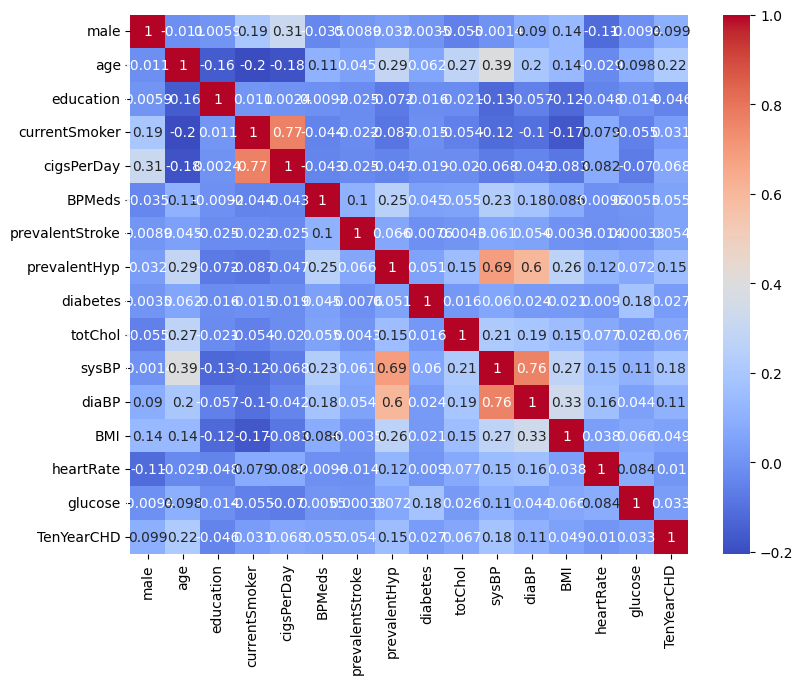

In [38]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<AxesSubplot:xlabel='TenYearCHD', ylabel='glucose'>

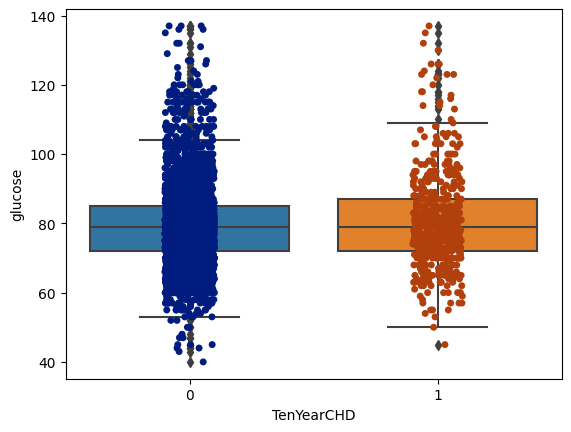

In [49]:
# plt.subplot(151)
sns.boxplot(y = "glucose", x = "TenYearCHD", data = df)
sns.stripplot(y = "glucose", x = "TenYearCHD", data = df, palette="dark")


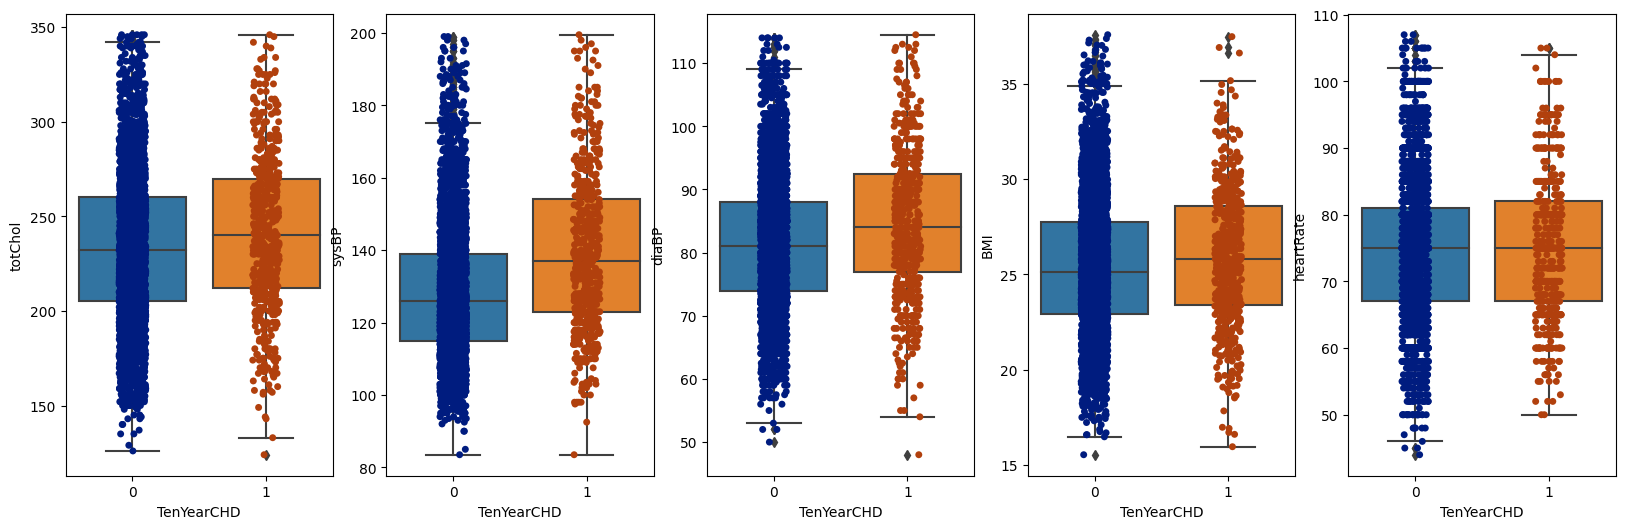

In [51]:
plt.figure(figsize = (20,6))
cl=['totChol', 'sysBP','diaBP', 'BMI', 'heartRate']
t='TenYearCHD'
index=1
for i in cl:
    plt.subplot(1,5,index)
    sns.boxplot(y = i, x = t, data = df)
    sns.stripplot(y = i, x = t, data = df, palette="dark")
    index += 1

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

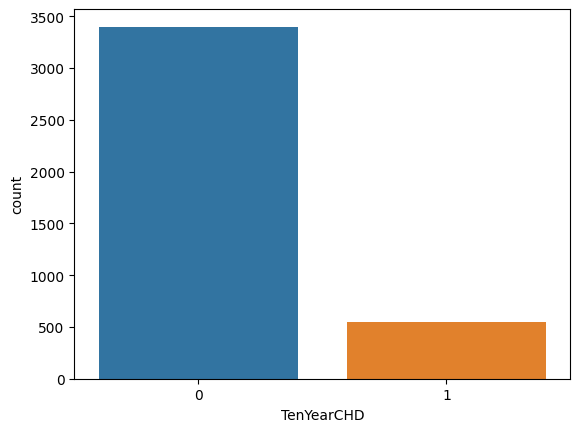

In [55]:
sns.countplot(x=df['TenYearCHD'])

In [57]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['TenYearCHD']==0)] 
df_minority_ = df[(df['TenYearCHD']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority_, 
                                 replace=True,    # sample with replacement
                                 n_samples= len(df_majority), # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
dff = pd.concat([df_minority_upsampled, df_majority])

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

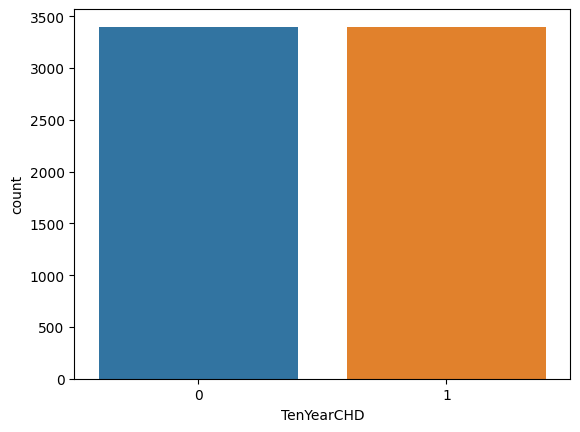

In [58]:
sns.countplot(x=dff['TenYearCHD'])

In [173]:
X=dff.drop(['TenYearCHD'], axis=1)
y=dff['TenYearCHD']

In [174]:
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
689,1,64,1.0,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,75.0,91.0
3363,0,66,1.0,0,0.0,0.0,0,1,0,312.0,150.0,74.0,25.59,72.0,90.0
2087,1,57,3.0,0,0.0,0.0,0,0,0,213.0,141.0,90.0,30.77,60.0,77.0
734,1,44,1.0,1,30.0,0.0,0,0,0,334.0,131.0,74.0,28.82,80.0,77.0
471,1,61,1.0,0,0.0,1.0,0,1,1,270.0,177.5,95.0,28.15,62.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.0


In [175]:
col=X.columns
col

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [176]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=col)

In [177]:
X.shape

(6796, 15)

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size= 0.20 , random_state= 42)

In [180]:
from sklearn.linear_model import LogisticRegression

In [181]:
lg = LogisticRegression()

In [182]:
lg.fit(x_train,y_train)

LogisticRegression()

In [183]:
lg.score(x_train , y_train)

0.6659308314937454

In [184]:
lg.score(x_test , y_test)

0.6544117647058824

In [185]:
y_pred =lg.predict(x_test)

In [186]:
dataf= pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
dataf.head(20)

,Y_test,Y_pred
2748,0,0
1855,1,1
3962,1,1
3018,0,1
2804,0,0
2685,0,0
1027,1,1
2841,0,1
567,0,1
1986,1,1


In [187]:
lg.intercept_

array([-2.73269854])

In [188]:
lg.coef_

array([[ 0.56817979,  2.64483547, -0.06345831,  0.22244882,  1.15236387,
         0.26755872,  0.68934782,  0.29705007, -0.31672834,  0.50958117,
         1.45532896, -0.41863581,  0.07915078, -0.12063233,  0.13792844]])

In [189]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
confusion_matrix(y_test, y_pred)


array([[445, 215],
       [255, 445]], dtype=int64)

In [190]:
accuracy_score(y_test,y_pred)

0.6544117647058824

In [191]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65       660
           1       0.67      0.64      0.65       700

    accuracy                           0.65      1360
   macro avg       0.65      0.65      0.65      1360
weighted avg       0.66      0.65      0.65      1360



In [192]:
from sklearn.model_selection import cross_val_score

In [193]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=10)

array([0.67647059, 0.67205882, 0.64705882, 0.67794118, 0.66176471,
       0.7       , 0.65684831, 0.67157585, 0.64801178, 0.66568483])

In [194]:
from sklearn.model_selection import cross_val_score,KFold,LeavePOut
from sklearn.ensemble import RandomForestClassifier

In [195]:
kf=KFold(n_splits=5)
score=cross_val_score(lg,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.43235294 0.45989698 0.68138337 0.44297277 0.44591611]
Average Cross Validation score :0.4925044366532485


In [196]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score ,LeaveOneOut

In [197]:
clf = DecisionTreeClassifier(random_state=42)
ss = ShuffleSplit(train_size=0.75, test_size=0.25, n_splits = 10)

scores = cross_val_score(clf, X, y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.91818717 0.91701001 0.91995291 0.91877575 0.91112419 0.90818128
 0.92466157 0.92054149 0.89582107 0.92113008]
Average CV Score:  0.9155385520894643
Number of CV Scores used in Average:  10


In [212]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors=3 , metric="manhattan"  )

In [213]:
knn.fit(x_train , y_train )

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [214]:
knn.score(x_train , y_train )

0.9288079470198676

In [201]:
knn.score(x_test , y_test )

0.8757352941176471

In [202]:
y_pred =knn.predict(x_test)

In [203]:
dataf= pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
dataf.head(20)

,Y_test,Y_pred
2748,0,0
1855,1,1
3962,1,1
3018,0,0
2804,0,0
2685,0,1
1027,1,1
2841,0,1
567,0,1
1986,1,1


In [204]:
confusion_matrix(y_test, y_pred)

array([[503, 157],
       [ 12, 688]], dtype=int64)

In [205]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       660
           1       0.81      0.98      0.89       700

    accuracy                           0.88      1360
   macro avg       0.90      0.87      0.87      1360
weighted avg       0.89      0.88      0.87      1360



Text(0.5, 23.52222222222222, 'Predicted label')

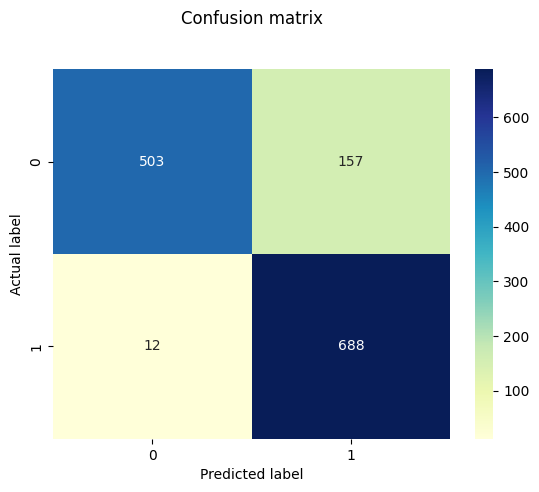

In [206]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

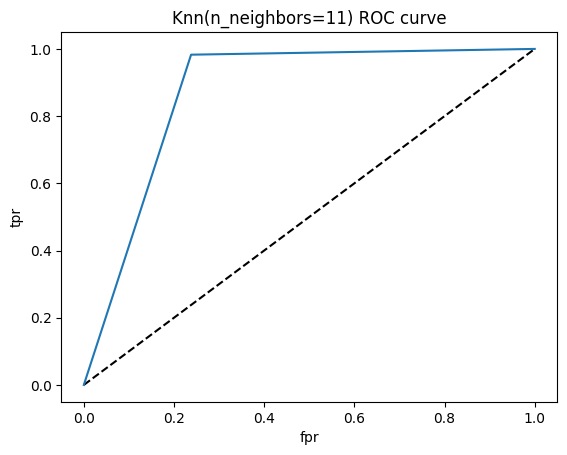

In [208]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

### Thank!